In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
from scipy import integrate
from scipy import optimize
from scipy import interpolate
from scipy import special
from scipy import misc

#Plots
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%pylab inline 
%config InlineBackend.figure_format = 'svg' 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = True

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Values of ell
ell_min = 2
ell_max = 5e3+1
ell_values = np.arange(int(ell_min),int(ell_max),1)

In [3]:
# Load fisher local
fisher_local_TT = np.loadtxt('./Files/signal_to_noise/T_only/local_snr2_lmax5000.txt')
fisher_local_EE = np.loadtxt('./Files/signal_to_noise/E_only/local_EE_snr2_lmax5000.txt')
fisher_local_TE = np.loadtxt('./Files/signal_to_noise/TE/local_snr2_TE.txt')
# Load fisher equil
fisher_equil_TT = np.loadtxt('./Files/signal_to_noise/T_only/equil_snr2_lmax5000')
fisher_equil_EE = np.loadtxt('./Files/signal_to_noise/E_only/equil_EE_snr2_lmax5000.txt')
fisher_equil_TE = np.loadtxt('./Files/signal_to_noise/TE/equil_snr2_TE.txt')
# Load fisher ortho
fisher_ortho_TT = np.loadtxt('./Files/signal_to_noise/T_only/ortho_snr2_lmax5000')
fisher_ortho_EE = np.loadtxt('./Files/signal_to_noise/E_only/ortho_EE_snr2_lmax5000.txt')
fisher_ortho_TE = np.loadtxt('./Files/signal_to_noise/TE/ortho_snr2_TE.txt')

In [4]:
limit = 1300
local_TT = []
for l in range(limit,5001,1):
    local_TT.append((l,fisher_local_TT[l-2]))
    
# savetxt('local_TT.txt',local_TT)

local_EE = []
for l in range(limit,5001,1):
    local_EE.append((l,fisher_local_EE[l-2]))
    
# savetxt('local_EE.txt',local_EE)

local_TE = []
for l in range(limit,5001,1):
    local_TE.append((l,fisher_local_TE[l-2]))
    
# savetxt('local_TE.txt',local_TE)

local_TT = np.array(local_TT)
local_EE = np.array(local_EE)
local_TE = np.array(local_TE)

# ----------------------------------------------------------------------------------------

equil_TT = []
for l in range(limit,5001,1):
    equil_TT.append((l,fisher_equil_TT[l-2]))
    
# savetxt('equil_TT.txt',equil_TT)

equil_EE = []
for l in range(limit,5001,1):
    equil_EE.append((l,fisher_equil_EE[l-2]))
    
# savetxt('equil_EE.txt',equil_EE)

equil_TE = []
for l in range(limit,5001,1):
    equil_TE.append((l,fisher_equil_TE[l-2]))
    
# savetxt('equil_TE.txt',equil_TE)

equil_TT = np.array(equil_TT)
equil_EE = np.array(equil_EE)
equil_TE = np.array(equil_TE)

# ----------------------------------------------------------------------------------------

ortho_TT = []
for l in range(limit,5001,1):
    ortho_TT.append((l,fisher_ortho_TT[l-2]))
    
# savetxt('ortho_TT.txt',ortho_TT)

ortho_EE = []
for l in range(limit,5001,1):
    ortho_EE.append((l,fisher_ortho_EE[l-2]))
    
# savetxt('ortho_EE.txt',ortho_EE)
ortho_TE = []
for l in range(limit,5001,1):
    ortho_TE.append((l,fisher_ortho_TE[l-2]))
    
# savetxt('ortho_TE.txt',ortho_TE)
ortho_TT = np.array(ortho_TT)
ortho_EE = np.array(ortho_EE)
ortho_TE = np.array(ortho_TE)

In [5]:
grad_local_TT = np.gradient(local_TT[:,1])
p_local_TT = local_TT[:,0]*grad_local_TT/local_TT[:,1]

grad_local_EE = np.gradient(local_EE[:,1])
p_local_EE = local_EE[:,0]*grad_local_EE/local_EE[:,1]

grad_local_TE = np.gradient(local_TE[:,1])
p_local_TE = local_TE[:,0]*grad_local_TE/local_TE[:,1]


grad_equil_TT = np.gradient(equil_TT[:,1])
p_equil_TT = equil_TT[:,0]*grad_equil_TT/equil_TT[:,1]

grad_equil_EE = np.gradient(equil_EE[:,1])
p_equil_EE = equil_EE[:,0]*grad_equil_EE/equil_EE[:,1]

grad_equil_TE = np.gradient(equil_TE[:,1])
p_equil_TE = equil_TE[:,0]*grad_equil_TE/equil_TE[:,1]


grad_ortho_TT = np.gradient(ortho_TT[:,1])
p_ortho_TT = ortho_TT[:,0]*grad_ortho_TT/ortho_TT[:,1]

grad_ortho_EE = np.gradient(ortho_EE[:,1])
p_ortho_EE = ortho_EE[:,0]*grad_ortho_EE/ortho_EE[:,1]

grad_ortho_TE = np.gradient(ortho_TE[:,1])
p_ortho_TE = ortho_TE[:,0]*grad_ortho_TE/ortho_TE[:,1]

In [6]:
def get_fit_scaling(x, a):
    return a

In [7]:
scaling_local_TT, scaling_cov_local_TT = optimize.curve_fit(get_fit_scaling, 
                                                            local_TT[:,0], 
                                                            p_local_TT,
                                                            p0=[2.0])
err_local_TT = np.sqrt(np.diag(scaling_cov_local_TT))

scaling_local_EE, scaling_cov_local_EE = optimize.curve_fit(get_fit_scaling, 
                                                            local_EE[:,0], 
                                                            p_local_EE,
                                                            p0=[2.0])
err_local_EE = np.sqrt(np.diag(scaling_cov_local_EE))

scaling_local_TE, scaling_cov_local_TE = optimize.curve_fit(get_fit_scaling, 
                                                            local_TE[:,0], 
                                                            p_local_TE,
                                                            p0=[2.0])
err_local_TE = np.sqrt(np.diag(scaling_cov_local_TE))

print('Local:','TTT =',scaling_local_TT,'+-',err_local_TT, 
      'EEE =',scaling_local_EE,'+-',err_local_EE,
      'T+E =',scaling_local_TE,'+-',err_local_TE,)

Local: TTT = [2.01689634] +- [0.00034454] EEE = [2.00455168] +- [0.00155589] T+E = [2.06503278] +- [0.00037126]


In [8]:
scaling_equil_TT, scaling_cov_equil_TT = optimize.curve_fit(get_fit_scaling, 
                                                            equil_TT[:,0], 
                                                            p_equil_TT,
                                                            p0=[1.0])
err_equil_TT = np.sqrt(np.diag(scaling_cov_equil_TT))

scaling_equil_EE, scaling_cov_equil_EE = optimize.curve_fit(get_fit_scaling, 
                                                            equil_EE[:,0], 
                                                            p_equil_EE,
                                                            p0=[1.0])
err_equil_EE = np.sqrt(np.diag(scaling_cov_equil_EE))

scaling_equil_TE, scaling_cov_equil_TE = optimize.curve_fit(get_fit_scaling, 
                                                            equil_TE[:,0], 
                                                            p_equil_TE,
                                                            p0=[1.0])
err_equil_TE = np.sqrt(np.diag(scaling_cov_equil_TE))

print('Equilateral:','TTT =',scaling_equil_TT,'+-',err_equil_TT,
      'EEE =',scaling_equil_EE,'+-',err_equil_EE,
      'T+E =',scaling_equil_TE,'+-',err_equil_TE,)

Equilateral: TTT = [0.91198844] +- [0.00286998] EEE = [0.93565144] +- [0.00383121] T+E = [1.1699667] +- [0.0028796]


In [9]:
scaling_ortho_TT, scaling_cov_ortho_TT = optimize.curve_fit(get_fit_scaling, 
                                                            ortho_TT[:,0], 
                                                            p_ortho_TT,
                                                            p0=[1.0])
err_ortho_TT = np.sqrt(np.diag(scaling_cov_ortho_TT))

scaling_ortho_EE, scaling_cov_ortho_EE = optimize.curve_fit(get_fit_scaling, 
                                                            ortho_EE[:,0], 
                                                            p_ortho_EE,
                                                            p0=[1.0])
err_ortho_EE = np.sqrt(np.diag(scaling_cov_ortho_EE))

scaling_ortho_TE, scaling_cov_ortho_TE = optimize.curve_fit(get_fit_scaling, 
                                                            ortho_TE[:,0], 
                                                            p_ortho_TE,
                                                            p0=[1.0])
err_ortho_TE = np.sqrt(np.diag(scaling_cov_ortho_TE))


print('Orthogonal:','TTT =',scaling_ortho_TT,'+-',err_ortho_TT,  
      'EEE =',scaling_ortho_EE,'+-',err_ortho_EE, 
      'T+E =',scaling_ortho_TE,'+-',err_ortho_TE,)

Orthogonal: TTT = [1.54412498] +- [0.00207052] EEE = [1.32599167] +- [0.00435393] T+E = [1.6580202] +- [0.00142304]


In [13]:
ggrad_ortho_TE = np.gradient(p_ortho_TE)

In [17]:
p_ortho_TE.shape

(3701,)

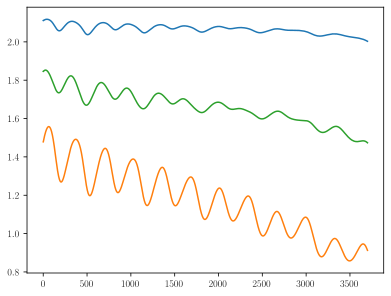

In [23]:
plt.plot(p_local_TE)
plt.plot(p_equil_TE)
plt.plot(p_ortho_TE)
show()

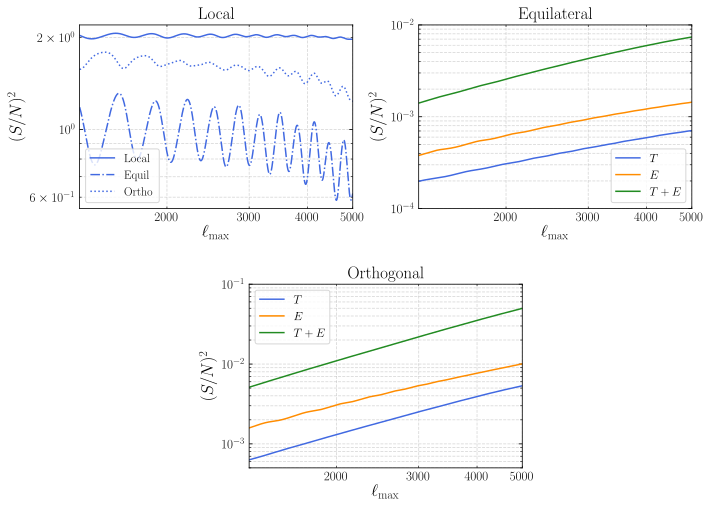

In [28]:
#plt.figure(figsize=(12,8))
#plt.figure(figsize=(14,10))
fig = plt.figure(figsize=(12,8))
#plt.figure(figsize=(15,11))

ax1 = plt.subplot2grid((7, 12), (0, 0), rowspan=3, colspan=5)
ax2 = plt.subplot2grid((7, 12), (0, 6), rowspan=3, colspan=5)
ax3 = plt.subplot2grid((7, 12), (4, 3), rowspan=3, colspan=5)
# subplots_adjust(hspace=0.30)
#########################################################################
x_formatter = ScalarFormatter()
x_formatter.set_scientific(False)
y_formatter = ScalarFormatter()
y_formatter.set_scientific(False)

ax1.loglog(local_TT[:,0], 
           p_local_TT, label = r'$\mathrm{Local}$', color = 'royalblue')
ax1.loglog(equil_TT[:,0], 
           p_equil_TT, label = r'$\mathrm{Equil}$', color = 'royalblue', linestyle = '-.')
ax1.loglog(ortho_TT[:,0], 
           p_ortho_TT, label = r'$\mathrm{Ortho}$', color = 'royalblue', linestyle = ':')

ax1.set_xlabel(r'$\ell_\mathrm{max}$', fontsize=17)
ax1.set_ylabel(r'$(S/N)^2$', fontsize=17)
ax1.legend(loc='best', fontsize=12)
ax1.set_title(r'$\mathrm{Local}$',fontsize=17)
ax1.set_xlim(limit, 5000)
ax1.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=13)
ax1.xaxis.set_major_formatter(x_formatter)
ax1.xaxis.set_minor_formatter(x_formatter)
# ax1.yaxis.set_major_formatter(y_formatter)
# ax1.yaxis.set_minor_formatter(y_formatter)
ax1.grid(True, which='both',linestyle='--', alpha = 0.5)

#########################################################################

ax2.loglog(equil_TT[:,0], 
           equil_TT[:,1], label =r'$T$', color = 'royalblue')
ax2.loglog(equil_EE[:,0], 
           equil_EE[:,1], label = r'$E$', color = 'darkorange')
ax2.loglog(equil_TE[:,0], 
           equil_TE[:,1], label = r'$T+E$', color = 'forestgreen')

ax2.set_xlabel(r'$\ell_\mathrm{max}$', fontsize=17)
ax2.set_ylabel(r'$(S/N)^2$', fontsize=17)
ax2.legend(loc='best', fontsize=12)
ax2.set_title(r'$\mathrm{Equilateral}$',fontsize=17)
ax2.set_xlim(limit, 5000)
ax2.set_ylim(1e-4, 1e-2)

ax2.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=13)
ax2.xaxis.set_major_formatter(x_formatter)
ax2.xaxis.set_minor_formatter(x_formatter)
# ax2.yaxis.set_major_formatter(y_formatter)
# ax2.yaxis.set_minor_formatter(y_formatter)
ax2.grid(True, which='both',linestyle='--', alpha = 0.5)

#########################################################################

ax3.loglog(ortho_TT[:,0], 
           ortho_TT[:,1], label = r'$T$', color = 'royalblue')
ax3.loglog(ortho_EE[:,0], 
           ortho_EE[:,1], label = r'$E$', color = 'darkorange')
ax3.loglog(ortho_TE[:,0], 
           ortho_TE[:,1], label = r'$T+E$', color = 'forestgreen')

ax3.set_xlabel(r'$\ell_\mathrm{max}$', fontsize=17)
ax3.set_ylabel(r'$(S/N)^2$', fontsize=17)
ax3.legend(loc='best', fontsize=12)
ax3.set_title(r'$\mathrm{Orthogonal}$',fontsize=17)
ax3.set_xlim(limit, 5000)
ax3.set_ylim(5e-4, 1e-1)

ax3.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=13)
ax3.xaxis.set_major_formatter(x_formatter)
ax3.xaxis.set_minor_formatter(x_formatter)
# ax3.yaxis.set_major_formatter(y_formatter)
# ax3.yaxis.set_minor_formatter(y_formatter)
ax3.grid(True, which='both',linestyle='--', alpha = 0.5)


show()
fig.savefig('./Plots/all_fisher.pdf', bbox_inches='tight')
#show